In [2]:
# 라이브러리
import pandas as pd
import networkx as nx
from igraph import Graph

## 이전2

In [2]:
# 데이터 불러오기
df = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/1.drug_totalnp_subacute.csv")
df

,drug_name,total_np_score,gene_list,unique_gene_count,Pubchem_CID,smiles
0,8-Amino-4-hydroxynaphthalene-2-sulfonic acid,0.151674,['Dusp5'],1,68106,Nc1cccc2c(O)cc(S(=O)(=O)O)cc12
1,"2-((1H-indol-5-yl)amino)-6-((2,4-difluoropheny...",0.108340,"['Plk4', 'Pdgfra', 'Map2k2', 'Tyk2', 'Plk1', '...",153,67240318,Cn1c(=O)c(S(=O)(=O)c2ccc(F)cc2F)cc2cnc(Nc3ccc4...
2,"5-(2-amino-[1,2,4]triazolo[1,5-a]pyridin-7-yl)...",0.084037,"['Plk4', 'Acvr1', 'Map2k2', 'Tyk2', 'Pi4kb', '...",100,44557921,CC(C)(C)NS(=O)(=O)c1cncc(-c2ccn3nc(N)nc3c2)c1
3,Cxcr2-IN-2,0.039105,"['Ccr5', 'Ackr2', 'Cx3cr1', 'Cxcr4', 'Cxcr5', ...",9,100951623,CC1=CCC[C@H]1NC(=O)Nc1ccc(Cl)c(S(=O)(=O)[C@@]2...
4,"1-isopropyl-N-((6-methyl-2-oxo-4-propyl-1,2-di...",0.035389,"['Ehmt2', 'Kmt2a', 'Setd7', 'Kmt2c', 'Dnmt3a',...",14,71268957,CCCc1cc(C)[nH]c(=O)c1CNC(=O)c1cc(-c2ccnc(N3CCN...
...,...,...,...,...,...,...
269627,"9-(1,2,3,4-Tetrahydroacridin-9-ylamino)nonanen...",0.000001,['Ache'],1,134157059,N#CCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
269628,"4-Chloro-5,6-dihydro-benzo[c]acridin-7-ylamine",0.000001,['Ache'],1,44344737,Nc1c2c(nc3ccccc13)-c1cccc(Cl)c1CC2
269629,1-[6-[4-[[Benzyl(methyl)amino]methyl]imidazol-...,0.000001,['Ache'],1,132520943,CCNC(=S)Nc1cc(-n2cnc(CN(C)Cc3ccccc3)c2)ncn1
269630,"2-(diethylamino)-1-[(1S,12S,14R)-14-hydroxy-9-...",0.000001,['Ache'],1,58872825,CCN(CC)CC(=O)N1CC[C@@]23C=C[C@H](O)C[C@@H]2Oc2...


In [8]:
# Check if 'gene_list' contains any empty lists
empty_gene_list_rows = df[df['gene_list'] == '[]']
print("Number of rows with empty gene_list:", len(empty_gene_list_rows))
print("Rows with empty gene_list:")
print(empty_gene_list_rows)

Number of rows with empty gene_list: 0
Rows with empty gene_list:
Empty DataFrame
Columns: [drug_name, total_np_score, gene_list, unique_gene_count, Pubchem_CID, smiles]
Index: []


In [7]:
# Degree Centrality 계산
# Convert 'gene_list' to a Python list if it's in string format
df['gene_list'] = df['gene_list'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Create an edge list for the graph using drug-gene pairs
edges = []
for _, row in df.iterrows():
    drug = row['drug_name']
    genes = row['gene_list']
    for gene in genes:
        edges.append((drug, gene))

# Initialize a Networkx graph
G = nx.Graph()
G.add_edges_from(edges)

# Calculate Degree Centrality as a test
degree_centrality = nx.degree_centrality(G)

# Convert to DataFrame
degree_df = pd.DataFrame({
    "Drug_name": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values())
})

# Sort the DataFrame by 'Degree Centrality' in descending order
degree_df_sorted = degree_df.sort_values(by="Degree Centrality", ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(degree_df_sorted)

                                                Drug_name  Degree Centrality
0                                                    Ache           0.033745
1                                                     Kdr           0.026665
2                                                    Egfr           0.025544
3                                                    Jak2           0.024294
4                                                  Pik3cd           0.023953
...                                                   ...                ...
269487  N-[2-methyl-5-[5-(3-propan-2-yloxyiminocyclobu...           0.000004
269488  N-[2-methyl-5-[5-(5-oxaspiro[3.4]octan-2-yl)-1...           0.000004
269489  N-[2-methyl-5-[5-[(2,2,3,3-tetrafluorocyclobut...           0.000004
269490  N-[2-methyl-5-[5-[(7R)-7-methyl-5,8-dioxaspiro...           0.000004
269491  [3-[[4-[(2-oxochromen-7-yl)oxymethyl]triazol-1...           0.000004

[269492 rows x 2 columns]


In [15]:
# csv로 저장
degree_df_sorted.to_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/1.centrality_degree.csv", index=False)

In [16]:
# csv 불러오기
centrality_degree = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/1.centrality_degree.csv")
centrality_degree

,Drug_name,Degree Centrality
0,Ache,0.033745
1,Kdr,0.026665
2,Egfr,0.025544
3,Jak2,0.024294
4,Pik3cd,0.023953
...,...,...
269487,N-[2-methyl-5-[5-(3-propan-2-yloxyiminocyclobu...,0.000004
269488,N-[2-methyl-5-[5-(5-oxaspiro[3.4]octan-2-yl)-1...,0.000004
269489,"N-[2-methyl-5-[5-[(2,2,3,3-tetrafluorocyclobut...",0.000004
269490,"N-[2-methyl-5-[5-[(7R)-7-methyl-5,8-dioxaspiro...",0.000004


In [ ]:
# Closeness Centrality
# Convert 'gene_list' to a Python list if it's in string format
df['gene_list'] = df['gene_list'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Create an edge list for the graph using drug-gene pairs
edges = []
for _, row in df.iterrows():
    drug = row['drug_name']
    genes = row['gene_list']
    for gene in genes:
        edges.append((drug, gene))

# Initialize a Networkx graph
G = nx.Graph()
G.add_edges_from(edges)

# Calculate Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Convert to DataFrame
closeness_df = pd.DataFrame({
    "Drug_name": list(closeness_centrality.keys()),
    "Closeness Centrality": list(closeness_centrality.values())
})

# Display the DataFrame
print(closeness_df)

closeness_df_sorted = closeness_df.sort_values(by="Closeness Centrality", ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(closeness_df_sorted)

# csv로 저장
closeness_df_sorted.to_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/1.centrality_closeness.csv", index=False)

KeyboardInterrupt: 

In [4]:
from multiprocessing import Pool

# 병렬 계산 함수 정의
def calculate_closeness(node):
    return node, nx.closeness_centrality(G, u=node)

# 노드 목록 생성
nodes = list(G.nodes)

# Pool을 이용한 병렬 처리
with Pool() as pool:
    closeness_centrality_parallel = dict(pool.map(calculate_closeness, nodes))

# DataFrame 변환 및 정렬
closeness_df_parallel = pd.DataFrame({
    "Drug_name": list(closeness_centrality_parallel.keys()),
    "Closeness Centrality": list(closeness_centrality_parallel.values())
})

closeness_df_sorted_parallel = closeness_df_parallel.sort_values(by="Closeness Centrality", ascending=False).reset_index(drop=True)
print(closeness_df_sorted_parallel)

KeyboardInterrupt: 

In [6]:
# Step 1: Load Data and Create Edge List
# 'df'는 Drug과 Gene 관계가 저장된 DataFrame으로 가정합니다
df['gene_list'] = df['gene_list'].apply(lambda x: eval(x) if isinstance(x, str) else x)

edges = []
for _, row in df.iterrows():
    drug = row['drug_name']
    genes = row['gene_list']
    for gene in genes:
        edges.append((drug, gene))

# Step 2: Initialize an iGraph Graph and Add Edges
# iGraph에서는 각 노드를 추가할 때 고유 이름이 있어야 하므로,
# `edges`에서 중복 없이 노드 목록을 먼저 추출하여 추가합니다.
unique_nodes = set([node for edge in edges for node in edge])
g = Graph()
g.add_vertices(list(unique_nodes))  # 노드를 추가
g.add_edges(edges)  # 엣지를 추가

# Step 3: Calculate Closeness Centrality
# iGraph의 closeness() 함수는 모든 노드의 근접 중심성을 계산합니다.
closeness_centrality = g.closeness()

# Step 4: Convert to DataFrame
# iGraph에서 노드 이름을 가져와 DataFrame에 매핑
closeness_df = pd.DataFrame({
    "Drug_name": g.vs["name"],  # 노드 이름
    "Closeness Centrality": closeness_centrality
})

# Step 5: Sort the DataFrame by Closeness Centrality
closeness_df_sorted = closeness_df.sort_values(by="Closeness Centrality", ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(closeness_df_sorted)

KeyboardInterrupt: 

In [ ]:
# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Convert to DataFrame
betweenness_df = pd.DataFrame({
    "Drug_name": list(betweenness_centrality.keys()),
    "Betweenness Centrality": list(betweenness_centrality.values())
})

# Display the DataFrame
print(betweenness_df)

betweenness_df_sorted = betweenness_df.sort_values(by="Betweenness Centrality", ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(betweenness_df_sorted)

KeyboardInterrupt: 

In [ ]:
# Calculate PageRank
pagerank = nx.pagerank(G, alpha=0.8)

# Convert to DataFrame
pagerank_df = pd.DataFrame({
    "Drug_name": list(pagerank.keys()),
    "PageRank": list(pagerank.values())
})

# Display the DataFrame
print(pagerank_df)

pagerank_df_sorted = pagerank_df.sort_values(by="PageRank", ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(pagerank_df_sorted)

In [2]:
subacute_np = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/1.subacute_np.csv")
subacute_np

,gene,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute padj,Subacute-log10(p_value),Subacute-log10(padj),np_score
0,Gnai3,-0.004249,0.981357,0.998485,0.008173,0.000659,0.014355
1,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818
2,Cav2,0.270668,0.196677,0.770430,0.706246,0.113267,0.010000
3,Klf6,0.079539,0.667442,0.958008,0.175587,0.018631,0.010000
4,Cox5a,0.394234,0.403343,0.889550,0.394326,0.050830,0.010393
...,...,...,...,...,...,...,...
4786,Cyp4f17,0.233701,0.716635,0.966595,0.144702,0.014755,0.010614
4787,Ube2d2a,0.339580,0.181684,0.753797,0.740683,0.122746,0.010456
4788,Hspa1a,-0.672831,0.587067,0.945780,0.231312,0.024210,0.010743
4789,Fancf,0.862063,0.079808,0.594731,1.097954,0.225679,0.010568


In [3]:
# 필요한 열 선택
genes_np = subacute_np[['gene', 'np_score']]
genes_np.head()

,gene,np_score
0,Gnai3,0.014355
1,Cdc45,0.011818
2,Cav2,0.010000
3,Klf6,0.010000
4,Cox5a,0.010393


In [4]:
import networkx as nx

# NetworkX 그래프 초기화
G = nx.Graph()

# np_score에 따라 유전자 네트워크 구성 (여기서는 각 유전자를 노드로 추가)
for _, row in genes_np.iterrows():
    gene = row['gene']
    np_score = row['np_score']
    G.add_node(gene, np_score=np_score)

In [5]:
# Degree Centrality 계산
degree_centrality = nx.degree_centrality(G)

# 결과를 DataFrame으로 변환
degree_df = pd.DataFrame({
    "Gene": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values())
})

degree_df_sort = degree_df.sort_values(by='Degree Centrality', ascending=False)
# Degree Centrality 출력
print(degree_df_sort)

         Gene  Degree Centrality
0       Gnai3                0.0
3199   Lpcat2                0.0
3197     Mgll                0.0
3196     Dis3                0.0
3195   Atp1a1                0.0
...       ...                ...
1596    Dpy30                0.0
1595      Xdh                0.0
1594    Ndc80                0.0
1593  Cyp4f13                0.0
4789    Med20                0.0

[4790 rows x 2 columns]


In [9]:
# Closeness Centrality 계산
closeness_centrality = nx.closeness_centrality(G)

# 결과를 DataFrame으로 변환
closeness_df = pd.DataFrame({
    "Gene": list(closeness_centrality.keys()),
    "Closeness Centrality": list(closeness_centrality.values())
})

closeness_df_sort = closeness_df.sort_values(by='Closeness Centrality', ascending=False)
# Closeness Centrality 출력
print(closeness_df_sort)

         Gene  Closeness Centrality
0       Gnai3                   0.0
3199   Lpcat2                   0.0
3197     Mgll                   0.0
3196     Dis3                   0.0
3195   Atp1a1                   0.0
...       ...                   ...
1596    Dpy30                   0.0
1595      Xdh                   0.0
1594    Ndc80                   0.0
1593  Cyp4f13                   0.0
4789    Med20                   0.0

[4790 rows x 2 columns]


## input_graph_800.txt 로 네트워크 구성 -> centrality 계산

In [2]:
# 유전자 네트워크 파일 불러오기 (엣지 리스트 형식)
edges_file = "/data1/project/eunyi/tbi/drug_gene/input_graph_800.txt"
edges_data = pd.read_csv(edges_file, sep='\t', header=None, names=['Gene1', 'Gene2', 'Weight'])
edges_data

,Gene1,Gene2,Weight
0,Gnai3,Rgs4,889.0
1,Gnai3,Drd2,969.0
2,Gnai3,Gnb4,916.0
3,Gnai3,Rgs3,956.0
4,Gnai3,Gnai1,901.0
...,...,...,...
14738,Tgfbr1,Tgfbr3,939.0
14739,Tgfbr1,Gdf11,999.0
14740,Tgfbr1,Smad4,994.0
14741,Tgfbr1,Tab1,834.0


In [3]:

# NetworkX 그래프 초기화 및 엣지 추가
G = nx.Graph()
for _, row in edges_data.iterrows():
    G.add_edge(row['Gene1'], row['Gene2'], weight=row['Weight'])

# 그래프 정보 확인
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 6050
Number of edges: 14235


In [8]:
# Degree Centrality 계산
degree_centrality = nx.degree_centrality(G)

# DataFrame으로 변환
degree_df = pd.DataFrame({
    "Gene": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values())
})

degree_df_sort = degree_df.sort_values(by='Degree Centrality', ascending=False)
degree_df_sort

,Gene,Degree Centrality
1014,Rps11,0.051744
438,Ctnnb1,0.037692
835,Akt1,0.035378
59,Prkacb,0.034386
1215,Prkaca,0.034386
...,...,...
3545,Prpf4b,0.000165
3546,Wdr53,0.000165
3550,Daw1,0.000165
3551,Ascc3,0.000165


In [9]:
degree_df_sort.to_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/2.degree_centrality_inputgraph.csv", index=False)

In [10]:
degree_centrality_inputgraph = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/2.degree_centrality_inputgraph.csv")
degree_centrality_inputgraph

,Gene,Degree Centrality
0,Rps11,0.051744
1,Ctnnb1,0.037692
2,Akt1,0.035378
3,Prkacb,0.034386
4,Prkaca,0.034386
...,...,...
6045,Prpf4b,0.000165
6046,Wdr53,0.000165
6047,Daw1,0.000165
6048,Ascc3,0.000165


In [16]:
# Closeness Centrality 계산
closeness_centrality = nx.closeness_centrality(G)

# DataFrame으로 변환
closeness_df = pd.DataFrame({
    "Gene": list(closeness_centrality.keys()),
    "Closeness Centrality": list(closeness_centrality.values())
})

closeness_df_sort = closeness_df.sort_values(by='Closeness Centrality', ascending=False)
closeness_df_sort

,Gene,Closeness Centrality
835,Akt1,0.300077
438,Ctnnb1,0.296046
1106,Pparg,0.278612
254,Trp53,0.276761
1215,Prkaca,0.275925
...,...,...
2786,Foxn1,0.000165
4384,Dnase2a,0.000165
2068,Slc19a1,0.000165
4385,Dnase2b,0.000165


In [19]:
closeness_df_sort.to_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/2.closeness_centrality_inputgraph.csv", index=False)

In [20]:
closeness_centrality_inputgraph = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/2.closeness_centrality_inputgraph.csv")
closeness_centrality_inputgraph

,Gene,Closeness Centrality
0,Akt1,0.300077
1,Ctnnb1,0.296046
2,Pparg,0.278612
3,Trp53,0.276761
4,Prkaca,0.275925
...,...,...
6045,Foxn1,0.000165
6046,Dnase2a,0.000165
6047,Slc19a1,0.000165
6048,Dnase2b,0.000165


In [17]:
# Betweenness Centrality 계산
betweenness_centrality = nx.betweenness_centrality(G)

# DataFrame으로 변환
betweenness_df = pd.DataFrame({
    "Gene": list(betweenness_centrality.keys()),
    "Betweenness Centrality": list(betweenness_centrality.values())
})

betweenness_df_sort = betweenness_df.sort_values(by='Betweenness Centrality', ascending=False)
betweenness_df_sort

,Gene,Betweenness Centrality
835,Akt1,0.139860
438,Ctnnb1,0.131747
1014,Rps11,0.080759
672,Cd44,0.060151
1106,Pparg,0.053054
...,...,...
3164,Syne2,0.000000
3165,Bclaf1,0.000000
3166,Sun2,0.000000
3167,Syne1,0.000000


In [21]:
betweenness_df_sort.to_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/2.betweenness_centrality_inputgraph.csv", index=False)

In [22]:
betweenness_centrality_inputgraph = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/2.betweenness_centrality_inputgraph.csv")
betweenness_centrality_inputgraph

,Gene,Betweenness Centrality
0,Akt1,0.139860
1,Ctnnb1,0.131747
2,Rps11,0.080759
3,Cd44,0.060151
4,Pparg,0.053054
...,...,...
6045,Syne2,0.000000
6046,Bclaf1,0.000000
6047,Sun2,0.000000
6048,Syne1,0.000000


## Scatterplot : x축은 np_score, y축은 centrality 바꿔가면서

In [3]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from adjustText import adjust_text

In [3]:
closeness_centrality_inputgraph = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/2.closeness_centrality_inputgraph.csv")
closeness_centrality_inputgraph

,Gene,Closeness Centrality
0,Akt1,0.300077
1,Ctnnb1,0.296046
2,Pparg,0.278612
3,Trp53,0.276761
4,Prkaca,0.275925
...,...,...
6045,Foxn1,0.000165
6046,Dnase2a,0.000165
6047,Slc19a1,0.000165
6048,Dnase2b,0.000165


In [4]:
subacute_gene_name_smiles = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/1.subacute_gene_name_smiles.csv")
subacute_gene_name_smiles

,gene,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute padj,Subacute-log10(p_value),Subacute-log10(padj),np_score,Pubchem_CID,smiles,drug_name
0,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818,10836454,CC(C)CCCC(C)[C@H]1CC[C@H]2[C@H](CC(=O)O)[C@@H]...,[5-(5-Cyanomethyl-2-methyl-tetrahydro-furan-2-...
1,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818,10765299,CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC(=O)O[...,"5-[(4R,4aS,6aR,7R,9aS,9bS)-4,6a-dimethyl-7-[(2..."
2,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818,44381072,CC(C)CCCC(C)[C@H]1CC[C@H]2[C@H](CC(=O)O)[C@@H]...,"[5-(5-Cyano-1-methyl-pentyl)-1-(1,5-dimethyl-h..."
3,Ngfr,-0.465395,0.638757,0.955227,0.194664,0.019894,0.014664,44358481,COC(=O)c1c(C)sc2c(O)cc(C(=O)Nn3cnnn3)nc12,"2-Methyl-7-oxo-5-(tetrazol-1-ylcarbamoyl)-4,7-..."
4,Ngfr,-0.465395,0.638757,0.955227,0.194664,0.019894,0.014664,17756791,Cc1cc2nc3c(=O)[nH]c(=O)nc-3n(C)c2cc1C=O,"7,10-Dimethyl-2,4-dioxo-2,3,4,10-tetrahydroben..."
...,...,...,...,...,...,...,...,...,...,...
476173,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,118706214,OCCCNc1ccc2c(c1)nc(-c1ccc3c(c1)OCO3)n1ncnc21,"3-[[5-(1,3-Benzodioxol-5-yl)-[1,2,4]triazolo[1..."
476174,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,51037112,Nc1nc2c3c(F)cccc3nc(Cc3ccc4c(c3)OCO4)n2n1,"5-(1,3-Benzodioxol-5-Ylmethyl)-10-Fluoro[1,2,4..."
476175,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,51036677,Nc1ccc2c(c1)nc(Cc1ccc3c(c1)OCO3)n1nc(N)nc21,"5-(1,3-Benzodioxol-5-ylmethyl)-[1,2,4]triazolo..."
476176,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,25210579,CN1CCN(c2ccc(OC(F)(F)F)c(Nc3nccc(-c4cc5c(n4C)C...,1-Methyl-2-(2-{[5-(4-Methylpiperazin-1-Yl)-2-(...


In [7]:
# 'gene' 열을 기준으로 데이터셋 병합
merged_data = pd.merge(subacute_gene_name_smiles, closeness_centrality_inputgraph[['Gene', 'Closeness Centrality']], 
                       left_on='gene', right_on='Gene', how='left')

# 불필요한 'Gene' 열 제거 (필요한 경우)
merged_data = merged_data.drop(columns=['Gene'])

merged_data

,gene,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute padj,Subacute-log10(p_value),Subacute-log10(padj),np_score,Pubchem_CID,smiles,drug_name,Closeness Centrality
0,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818,10836454,CC(C)CCCC(C)[C@H]1CC[C@H]2[C@H](CC(=O)O)[C@@H]...,[5-(5-Cyanomethyl-2-methyl-tetrahydro-furan-2-...,0.214140
1,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818,10765299,CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC(=O)O[...,"5-[(4R,4aS,6aR,7R,9aS,9bS)-4,6a-dimethyl-7-[(2...",0.214140
2,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818,44381072,CC(C)CCCC(C)[C@H]1CC[C@H]2[C@H](CC(=O)O)[C@@H]...,"[5-(5-Cyano-1-methyl-pentyl)-1-(1,5-dimethyl-h...",0.214140
3,Ngfr,-0.465395,0.638757,0.955227,0.194664,0.019894,0.014664,44358481,COC(=O)c1c(C)sc2c(O)cc(C(=O)Nn3cnnn3)nc12,"2-Methyl-7-oxo-5-(tetrazol-1-ylcarbamoyl)-4,7-...",0.236426
4,Ngfr,-0.465395,0.638757,0.955227,0.194664,0.019894,0.014664,17756791,Cc1cc2nc3c(=O)[nH]c(=O)nc-3n(C)c2cc1C=O,"7,10-Dimethyl-2,4-dioxo-2,3,4,10-tetrahydroben...",0.236426
...,...,...,...,...,...,...,...,...,...,...,...
476173,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,118706214,OCCCNc1ccc2c(c1)nc(-c1ccc3c(c1)OCO3)n1ncnc21,"3-[[5-(1,3-Benzodioxol-5-yl)-[1,2,4]triazolo[1...",0.209065
476174,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,51037112,Nc1nc2c3c(F)cccc3nc(Cc3ccc4c(c3)OCO4)n2n1,"5-(1,3-Benzodioxol-5-Ylmethyl)-10-Fluoro[1,2,4...",0.209065
476175,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,51036677,Nc1ccc2c(c1)nc(Cc1ccc3c(c1)OCO3)n1nc(N)nc21,"5-(1,3-Benzodioxol-5-ylmethyl)-[1,2,4]triazolo...",0.209065
476176,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,25210579,CN1CCN(c2ccc(OC(F)(F)F)c(Nc3nccc(-c4cc5c(n4C)C...,1-Methyl-2-(2-{[5-(4-Methylpiperazin-1-Yl)-2-(...,0.209065


In [9]:
merged_data.to_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/2.subacute_closenesscentrality.csv", index=False)

In [4]:
subacute_closenesscentrality = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/2.subacute_closenesscentrality.csv")
subacute_closenesscentrality

,gene,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute padj,Subacute-log10(p_value),Subacute-log10(padj),np_score,Pubchem_CID,smiles,drug_name,Closeness Centrality
0,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818,10836454,CC(C)CCCC(C)[C@H]1CC[C@H]2[C@H](CC(=O)O)[C@@H]...,[5-(5-Cyanomethyl-2-methyl-tetrahydro-furan-2-...,0.214140
1,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818,10765299,CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC(=O)O[...,"5-[(4R,4aS,6aR,7R,9aS,9bS)-4,6a-dimethyl-7-[(2...",0.214140
2,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818,44381072,CC(C)CCCC(C)[C@H]1CC[C@H]2[C@H](CC(=O)O)[C@@H]...,"[5-(5-Cyano-1-methyl-pentyl)-1-(1,5-dimethyl-h...",0.214140
3,Ngfr,-0.465395,0.638757,0.955227,0.194664,0.019894,0.014664,44358481,COC(=O)c1c(C)sc2c(O)cc(C(=O)Nn3cnnn3)nc12,"2-Methyl-7-oxo-5-(tetrazol-1-ylcarbamoyl)-4,7-...",0.236426
4,Ngfr,-0.465395,0.638757,0.955227,0.194664,0.019894,0.014664,17756791,Cc1cc2nc3c(=O)[nH]c(=O)nc-3n(C)c2cc1C=O,"7,10-Dimethyl-2,4-dioxo-2,3,4,10-tetrahydroben...",0.236426
...,...,...,...,...,...,...,...,...,...,...,...
476173,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,118706214,OCCCNc1ccc2c(c1)nc(-c1ccc3c(c1)OCO3)n1ncnc21,"3-[[5-(1,3-Benzodioxol-5-yl)-[1,2,4]triazolo[1...",0.209065
476174,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,51037112,Nc1nc2c3c(F)cccc3nc(Cc3ccc4c(c3)OCO4)n2n1,"5-(1,3-Benzodioxol-5-Ylmethyl)-10-Fluoro[1,2,4...",0.209065
476175,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,51036677,Nc1ccc2c(c1)nc(Cc1ccc3c(c1)OCO3)n1nc(N)nc21,"5-(1,3-Benzodioxol-5-ylmethyl)-[1,2,4]triazolo...",0.209065
476176,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,25210579,CN1CCN(c2ccc(OC(F)(F)F)c(Nc3nccc(-c4cc5c(n4C)C...,1-Methyl-2-(2-{[5-(4-Methylpiperazin-1-Yl)-2-(...,0.209065


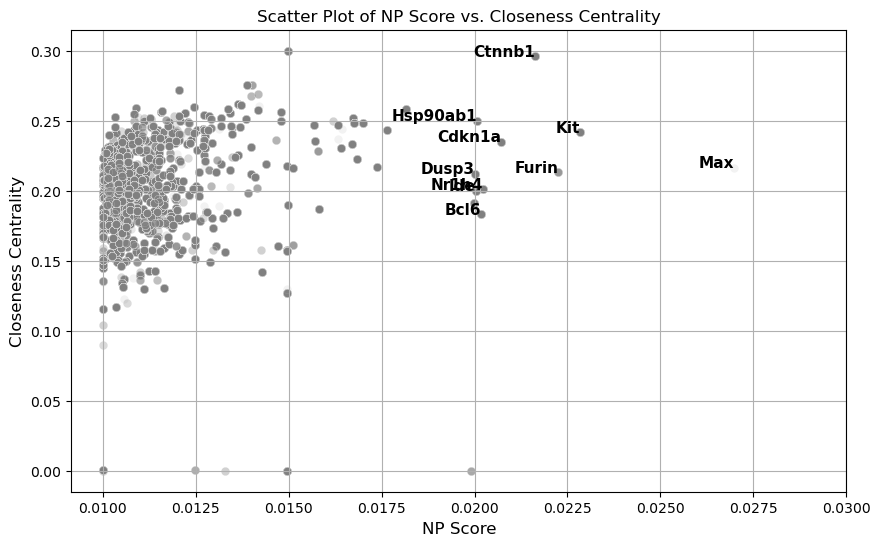

In [47]:
# np_score와 Closeness Centrality가 높은 순서대로 정렬한 후, 유일한 gene 10개 선택
top_genes = subacute_closenesscentrality.sort_values(
    by=['np_score', 'Closeness Centrality'], ascending=False
).drop_duplicates(subset=['gene']).head(10)

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subacute_closenesscentrality, x='np_score', y='Closeness Centrality', alpha=0.1, color='gray')
# 상위 10개 gene에 라벨 추가
texts = []
for _, row in top_genes.iterrows():
    plt.text(row['np_score'], row['Closeness Centrality'], row['gene'], 
             fontsize=11, ha='right', fontweight='bold')  # 글자 색상을 파란색으로 설정
# adjust_text로 레이블 위치 자동 조정, 화살표 추가
adjust_text(
    texts, 
    only_move={'points': 'xy', 'text': 'xy'}, 
    arrowprops=dict(arrowstyle='->', color='gray'),  # 화살표 스타일 설정
    expand_text=(4, 4),  # 텍스트 간 간격을 더 넓힘
    expand_points=(2, 2),  # 점과 텍스트 간 간격을 더 넓힘
    force_text=5,  # 텍스트 간 밀어내기 강도를 높임
    force_points=1  # 텍스트와 점 간 밀어내기 강도를 높임
)
plt.xlabel('NP Score', fontsize=12)
plt.ylabel('Closeness Centrality', fontsize=12)
plt.title('Scatter Plot of NP Score vs. Closeness Centrality', fontsize=12)
plt.xlim(right=0.0300)
plt.grid(True)
plt.show()

In [16]:
# drug_name 열의 전체 내용을 표시하도록 설정
pd.set_option('display.max_colwidth', None)
top_genes[['gene', 'Pubchem_CID', 'drug_name', 'np_score', 'Closeness Centrality']]

,gene,Pubchem_CID,drug_name,np_score,Closeness Centrality
440552,Max,2836606,"4-(7-Nitro-benzo[1,2,5]oxadiazol-4-ylamino)-benzoic acid",0.026971,0.216621
25726,Kit,57496699,"N-[2-(4-{[3-chloro-4-(3-chlorophenoxy)phenyl]amino}-5H-pyrrolo[3,2-d]pyrimidin-5-yl)ethyl]-2-methyl-2-(methylsulfonyl)propanamide",0.022844,0.241796
284362,Furin,44156976,JNK Inhibitor XI,0.022256,0.213341
30722,Ctnnb1,71695771,1-Hydroxy-5-[2-(2H-tetrazol-5-yl)ethyl]-1H-indazole,0.021635,0.296046
133822,Cdkn1a,44388828,"2-(2-fluoro-4-methoxyphenyl)-5,6,7,8-tetrahydro-3H-[1]benzothiolo[2,3-d]pyrimidin-4-one",0.020711,0.235052
413544,Nr1h4,91896087,"6-[4-[[5-(1-Chloroethyl)-3-(3,5-dichloro-1-methyl-2-oxopyridin-4-yl)-1,2-oxazol-4-yl]methoxy]-2-methylphenyl]-1-methylindole-3-carboxylic acid",0.020237,0.201120
123992,Bcl6,25232818,"(4S)-N-[(2S,3R)-4-[[3-(dimethylamino)phenyl]methylamino]-3-hydroxy-1-phenylbutan-2-yl]-2-oxo-1-[[4-(trifluoromethyl)phenyl]methyl]imidazolidine-4-carboxamide",0.020166,0.183440
153032,Hsp90ab1,117890268,"8-(3,5-Dichlorophenyl)sulfanyl-9-hex-5-ynylpurin-6-amine",0.020070,0.250071
435032,Ide,138106813,"US9610322, 4a (cis olefin)",0.020034,0.200055
14988,Dusp3,6000533,"2-[2,6-dichloro-4-[(Z)-[6-ethoxycarbonyl-5-(3-methoxyphenyl)-7-methyl-3-oxo-5H-[1,3]thiazolo[3,2-a]pyrimidin-2-ylidene]methyl]phenoxy]acetic acid",0.020012,0.212285


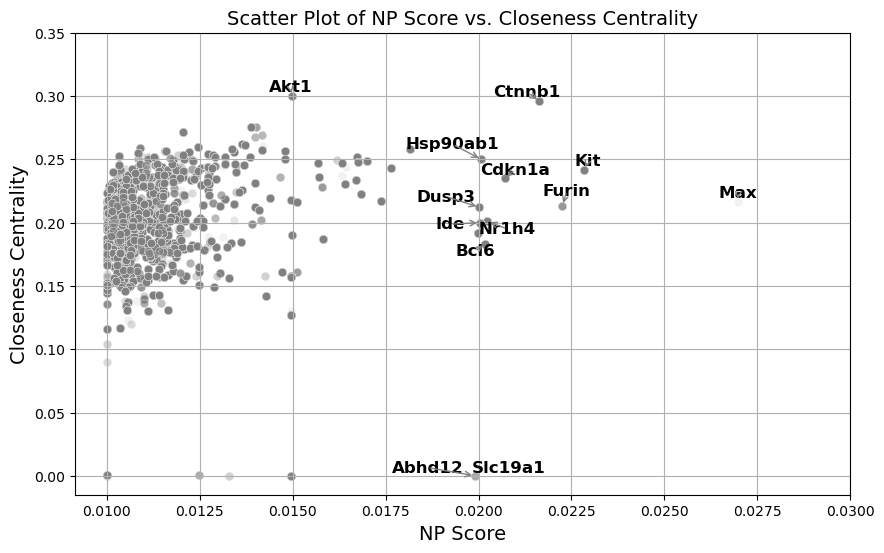

In [28]:
# np_score와 Closeness Centrality가 높은 순서대로 정렬한 후, 유일한 gene 10개 선택
top_genes = subacute_closenesscentrality.sort_values(
    by=['np_score', 'Closeness Centrality'], ascending=False
).drop_duplicates(subset=['gene']).head(10)

# 추가할 gene: y축이 0.30 근처에 있는 점과 x축이 0.0200 근처, y축이 0.00 근처에 있는 점
additional_genes = subacute_closenesscentrality[
    ((subacute_closenesscentrality['Closeness Centrality'] >= 0.29) |
     ((subacute_closenesscentrality['np_score'] >= 0.0195) & 
      (subacute_closenesscentrality['np_score'] <= 0.0205) &
      (subacute_closenesscentrality['Closeness Centrality'] <= 0.01)))
]

# 상위 10개의 gene과 추가 gene을 합침
all_genes = pd.concat([top_genes, additional_genes]).drop_duplicates(subset=['gene'])

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subacute_closenesscentrality, x='np_score', y='Closeness Centrality', alpha=0.1, color='gray')

# gene에 라벨 추가
texts = []
for _, row in all_genes.iterrows():
    text = plt.text(row['np_score'], row['Closeness Centrality'], row['gene'], 
                    fontsize=12, ha='right', fontweight='bold')
    texts.append(text)

# adjust_text로 레이블 위치 자동 조정, 화살표 추가
adjust_text(
    texts, 
    only_move={'points': 'xy', 'text': 'xy'}, 
    arrowprops=dict(arrowstyle='->', color='gray'),  # 화살표 스타일 설정
    expand_text=(4, 4),  # 텍스트 간 간격을 더 넓힘
    expand_points=(2, 2),  # 점과 텍스트 간 간격을 더 넓힘
    force_text=5,  # 텍스트 간 밀어내기 강도를 높임
    force_points=1  # 텍스트와 점 간 밀어내기 강도를 높임
)

plt.xlabel('NP Score', fontsize=14)
plt.ylabel('Closeness Centrality', fontsize=14)
plt.title('Scatter Plot of NP Score vs. Closeness Centrality', fontsize=14)
plt.xlim(right=0.0300)
plt.ylim(top=0.35)
plt.grid(True)
plt.show()

In [18]:
# drug_name 열의 전체 내용을 표시하도록 설정
pd.set_option('display.max_colwidth', None)
all_genes[['gene', 'Pubchem_CID', 'drug_name', 'np_score', 'Closeness Centrality']]

,gene,Pubchem_CID,drug_name,np_score,Closeness Centrality
440552,Max,2836606,"4-(7-Nitro-benzo[1,2,5]oxadiazol-4-ylamino)-benzoic acid",0.026971,0.216621
25726,Kit,57496699,"N-[2-(4-{[3-chloro-4-(3-chlorophenoxy)phenyl]amino}-5H-pyrrolo[3,2-d]pyrimidin-5-yl)ethyl]-2-methyl-2-(methylsulfonyl)propanamide",0.022844,0.241796
284362,Furin,44156976,JNK Inhibitor XI,0.022256,0.213341
30722,Ctnnb1,71695771,1-Hydroxy-5-[2-(2H-tetrazol-5-yl)ethyl]-1H-indazole,0.021635,0.296046
133822,Cdkn1a,44388828,"2-(2-fluoro-4-methoxyphenyl)-5,6,7,8-tetrahydro-3H-[1]benzothiolo[2,3-d]pyrimidin-4-one",0.020711,0.235052
413544,Nr1h4,91896087,"6-[4-[[5-(1-Chloroethyl)-3-(3,5-dichloro-1-methyl-2-oxopyridin-4-yl)-1,2-oxazol-4-yl]methoxy]-2-methylphenyl]-1-methylindole-3-carboxylic acid",0.020237,0.201120
123992,Bcl6,25232818,"(4S)-N-[(2S,3R)-4-[[3-(dimethylamino)phenyl]methylamino]-3-hydroxy-1-phenylbutan-2-yl]-2-oxo-1-[[4-(trifluoromethyl)phenyl]methyl]imidazolidine-4-carboxamide",0.020166,0.183440
153032,Hsp90ab1,117890268,"8-(3,5-Dichlorophenyl)sulfanyl-9-hex-5-ynylpurin-6-amine",0.020070,0.250071
435032,Ide,138106813,"US9610322, 4a (cis olefin)",0.020034,0.200055
14988,Dusp3,6000533,"2-[2,6-dichloro-4-[(Z)-[6-ethoxycarbonyl-5-(3-methoxyphenyl)-7-methyl-3-oxo-5H-[1,3]thiazolo[3,2-a]pyrimidin-2-ylidene]methyl]phenoxy]acetic acid",0.020012,0.212285


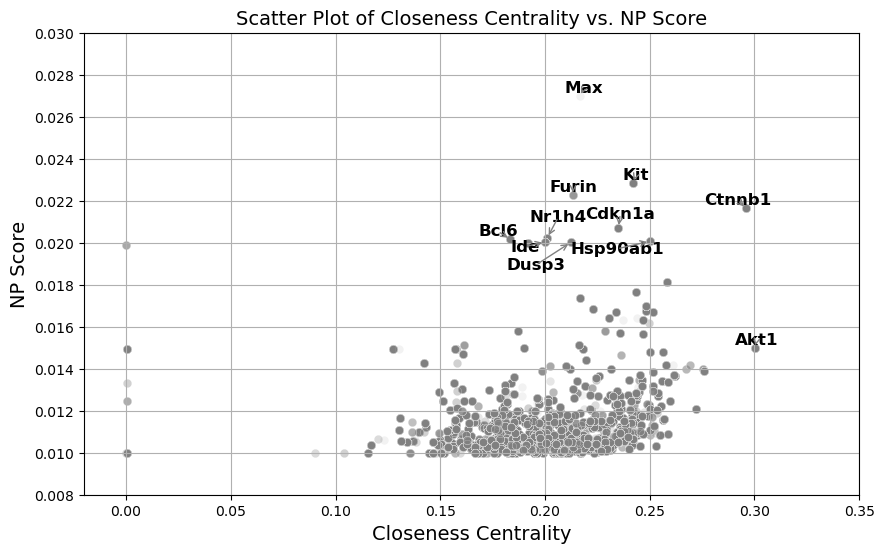

In [32]:
# np_score와 Closeness Centrality가 높은 순서대로 정렬한 후, 유일한 gene 10개 선택
top_genes = subacute_closenesscentrality.sort_values(
    by=['np_score', 'Closeness Centrality'], ascending=False
).drop_duplicates(subset=['gene']).head(10)

# 추가할 gene: Closeness Centrality가 0.30 근처에 있는 gene
additional_genes = subacute_closenesscentrality[
    (subacute_closenesscentrality['Closeness Centrality'] >= 0.29) &
    (subacute_closenesscentrality['Closeness Centrality'] <= 0.31)
]

# 상위 10개의 gene과 추가 gene을 합침
all_genes = pd.concat([top_genes, additional_genes]).drop_duplicates(subset=['gene'])

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subacute_closenesscentrality, x='Closeness Centrality', y='np_score', alpha=0.1, color='gray')

# gene에 라벨 추가
texts = []
for _, row in all_genes.iterrows():
    text = plt.text(row['Closeness Centrality'], row['np_score'], row['gene'], 
                    fontsize=12, ha='right', fontweight='bold')
    texts.append(text)

# adjust_text로 레이블 위치 자동 조정, 화살표 추가
adjust_text(
    texts, 
    only_move={'points': 'xy', 'text': 'xy'}, 
    arrowprops=dict(arrowstyle='->', color='gray'),  # 화살표 스타일 설정
    expand_text=(4, 4),  # 텍스트 간 간격을 더 넓힘
    expand_points=(2, 2),  # 점과 텍스트 간 간격을 더 넓힘
    force_text=5,  # 텍스트 간 밀어내기 강도를 높임
    force_points=1  # 텍스트와 점 간 밀어내기 강도를 높임
)

# 축 라벨, 범위 및 눈금 설정
plt.xlabel('Closeness Centrality', fontsize=14)
plt.ylabel('NP Score', fontsize=14)
plt.title('Scatter Plot of Closeness Centrality vs. NP Score', fontsize=14)
plt.xlim(-0.02, 0.35)
plt.ylim(0.008, 0.030)
plt.xticks(ticks=[i * 0.05 for i in range(8)])  # x축을 0.05 간격으로 설정
plt.yticks(ticks=[round(0.008 + i * 0.002, 3) for i in range(12)])  # y축을 0.002 간격으로 설정
plt.grid(True)
plt.show()

In [19]:
betweenness_centrality_inputgraph = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/2.betweenness_centrality_inputgraph.csv")
betweenness_centrality_inputgraph

,Gene,Betweenness Centrality
0,Akt1,0.139860
1,Ctnnb1,0.131747
2,Rps11,0.080759
3,Cd44,0.060151
4,Pparg,0.053054
...,...,...
6045,Syne2,0.000000
6046,Bclaf1,0.000000
6047,Sun2,0.000000
6048,Syne1,0.000000


In [10]:
# 'gene' 열을 기준으로 데이터셋 병합
merged_data = pd.merge(subacute_gene_name_smiles, betweenness_centrality_inputgraph[['Gene', 'Betweenness Centrality']], 
                       left_on='gene', right_on='Gene', how='left')

# 불필요한 'Gene' 열 제거 (필요한 경우)
merged_data = merged_data.drop(columns=['Gene'])

merged_data

,gene,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute padj,Subacute-log10(p_value),Subacute-log10(padj),np_score,Pubchem_CID,smiles,drug_name,Betweenness Centrality
0,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818,10836454,CC(C)CCCC(C)[C@H]1CC[C@H]2[C@H](CC(=O)O)[C@@H]...,[5-(5-Cyanomethyl-2-methyl-tetrahydro-furan-2-...,0.007386
1,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818,10765299,CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC(=O)O[...,"5-[(4R,4aS,6aR,7R,9aS,9bS)-4,6a-dimethyl-7-[(2...",0.007386
2,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818,44381072,CC(C)CCCC(C)[C@H]1CC[C@H]2[C@H](CC(=O)O)[C@@H]...,"[5-(5-Cyano-1-methyl-pentyl)-1-(1,5-dimethyl-h...",0.007386
3,Ngfr,-0.465395,0.638757,0.955227,0.194664,0.019894,0.014664,44358481,COC(=O)c1c(C)sc2c(O)cc(C(=O)Nn3cnnn3)nc12,"2-Methyl-7-oxo-5-(tetrazol-1-ylcarbamoyl)-4,7-...",0.010135
4,Ngfr,-0.465395,0.638757,0.955227,0.194664,0.019894,0.014664,17756791,Cc1cc2nc3c(=O)[nH]c(=O)nc-3n(C)c2cc1C=O,"7,10-Dimethyl-2,4-dioxo-2,3,4,10-tetrahydroben...",0.010135
...,...,...,...,...,...,...,...,...,...,...,...
476173,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,118706214,OCCCNc1ccc2c(c1)nc(-c1ccc3c(c1)OCO3)n1ncnc21,"3-[[5-(1,3-Benzodioxol-5-yl)-[1,2,4]triazolo[1...",0.000000
476174,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,51037112,Nc1nc2c3c(F)cccc3nc(Cc3ccc4c(c3)OCO4)n2n1,"5-(1,3-Benzodioxol-5-Ylmethyl)-10-Fluoro[1,2,4...",0.000000
476175,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,51036677,Nc1ccc2c(c1)nc(Cc1ccc3c(c1)OCO3)n1nc(N)nc21,"5-(1,3-Benzodioxol-5-ylmethyl)-[1,2,4]triazolo...",0.000000
476176,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,25210579,CN1CCN(c2ccc(OC(F)(F)F)c(Nc3nccc(-c4cc5c(n4C)C...,1-Methyl-2-(2-{[5-(4-Methylpiperazin-1-Yl)-2-(...,0.000000


In [11]:
merged_data.to_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/2.subacute_betweennesscentrality.csv", index=False)

In [11]:
subacute_betweennesscentrality = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/cid_name/2.subacute_betweennesscentrality.csv")
subacute_betweennesscentrality

,gene,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute padj,Subacute-log10(p_value),Subacute-log10(padj),np_score,Pubchem_CID,smiles,drug_name,Betweenness Centrality
0,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818,10836454,CC(C)CCCC(C)[C@H]1CC[C@H]2[C@H](CC(=O)O)[C@@H]...,[5-(5-Cyanomethyl-2-methyl-tetrahydro-furan-2-...,0.007386
1,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818,10765299,CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC(=O)O[...,"5-[(4R,4aS,6aR,7R,9aS,9bS)-4,6a-dimethyl-7-[(2...",0.007386
2,Cdc45,0.048852,0.908633,0.991531,0.041611,0.003694,0.011818,44381072,CC(C)CCCC(C)[C@H]1CC[C@H]2[C@H](CC(=O)O)[C@@H]...,"[5-(5-Cyano-1-methyl-pentyl)-1-(1,5-dimethyl-h...",0.007386
3,Ngfr,-0.465395,0.638757,0.955227,0.194664,0.019894,0.014664,44358481,COC(=O)c1c(C)sc2c(O)cc(C(=O)Nn3cnnn3)nc12,"2-Methyl-7-oxo-5-(tetrazol-1-ylcarbamoyl)-4,7-...",0.010135
4,Ngfr,-0.465395,0.638757,0.955227,0.194664,0.019894,0.014664,17756791,Cc1cc2nc3c(=O)[nH]c(=O)nc-3n(C)c2cc1C=O,"7,10-Dimethyl-2,4-dioxo-2,3,4,10-tetrahydroben...",0.010135
...,...,...,...,...,...,...,...,...,...,...,...
476173,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,118706214,OCCCNc1ccc2c(c1)nc(-c1ccc3c(c1)OCO3)n1ncnc21,"3-[[5-(1,3-Benzodioxol-5-yl)-[1,2,4]triazolo[1...",0.000000
476174,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,51037112,Nc1nc2c3c(F)cccc3nc(Cc3ccc4c(c3)OCO4)n2n1,"5-(1,3-Benzodioxol-5-Ylmethyl)-10-Fluoro[1,2,4...",0.000000
476175,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,51036677,Nc1ccc2c(c1)nc(Cc1ccc3c(c1)OCO3)n1nc(N)nc21,"5-(1,3-Benzodioxol-5-ylmethyl)-[1,2,4]triazolo...",0.000000
476176,Rps27,0.450686,0.139803,0.709712,0.854485,0.148918,0.010150,25210579,CN1CCN(c2ccc(OC(F)(F)F)c(Nc3nccc(-c4cc5c(n4C)C...,1-Methyl-2-(2-{[5-(4-Methylpiperazin-1-Yl)-2-(...,0.000000


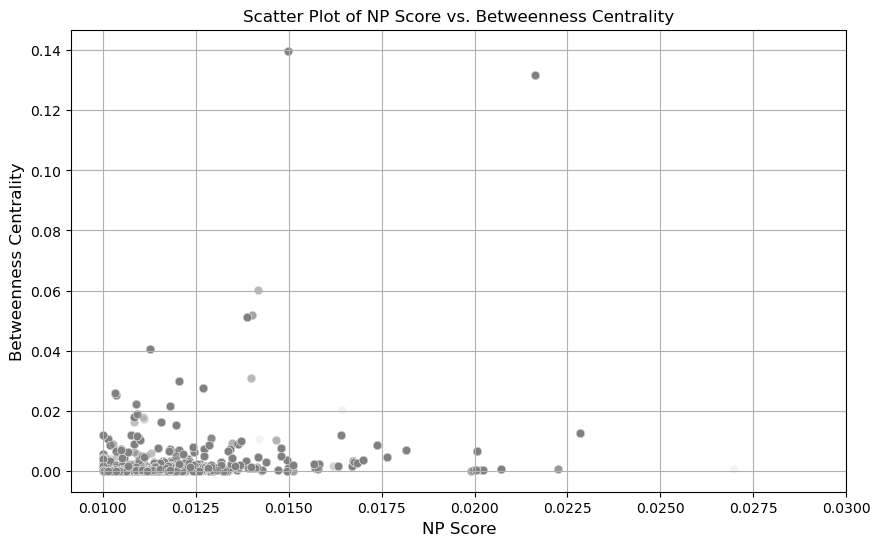

In [ ]:
# np_score와 Betweenness Centrality가 높은 순서대로 정렬한 후, 유일한 gene 10개 선택
top_genes = subacute_betweennesscentrality.sort_values(
    by=['np_score', 'Betweenness Centrality'], ascending=False
).drop_duplicates(subset=['gene']).head(10)

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subacute_betweennesscentrality, x='np_score', y='Betweenness Centrality', alpha=0.1, color='gray')

plt.xlabel('NP Score', fontsize=12)
plt.ylabel('Betweenness Centrality', fontsize=12)
plt.title('Scatter Plot of NP Score vs. Betweenness Centrality', fontsize=12)
plt.xlim(right=0.0300)
plt.grid(True)
plt.show()

In [49]:
top_genes[['gene', 'drug_name', 'np_score', 'Betweenness Centrality']]

,gene,drug_name,np_score,Betweenness Centrality
440552,Max,"4-(7-Nitro-benzo[1,2,5]oxadiazol-4-ylamino)-benzoic acid",0.026971,0.000472
25726,Kit,"N-[2-(4-{[3-chloro-4-(3-chlorophenoxy)phenyl]amino}-5H-pyrrolo[3,2-d]pyrimidin-5-yl)ethyl]-2-methyl-2-(methylsulfonyl)propanamide",0.022844,0.012434
284362,Furin,JNK Inhibitor XI,0.022256,0.000613
30722,Ctnnb1,1-Hydroxy-5-[2-(2H-tetrazol-5-yl)ethyl]-1H-indazole,0.021635,0.131747
133822,Cdkn1a,"2-(2-fluoro-4-methoxyphenyl)-5,6,7,8-tetrahydro-3H-[1]benzothiolo[2,3-d]pyrimidin-4-one",0.020711,0.000454
413544,Nr1h4,"6-[4-[[5-(1-Chloroethyl)-3-(3,5-dichloro-1-methyl-2-oxopyridin-4-yl)-1,2-oxazol-4-yl]methoxy]-2-methylphenyl]-1-methylindole-3-carboxylic acid",0.020237,0.000391
123992,Bcl6,"(4S)-N-[(2S,3R)-4-[[3-(dimethylamino)phenyl]methylamino]-3-hydroxy-1-phenylbutan-2-yl]-2-oxo-1-[[4-(trifluoromethyl)phenyl]methyl]imidazolidine-4-carboxamide",0.020166,0.000335
153032,Hsp90ab1,"8-(3,5-Dichlorophenyl)sulfanyl-9-hex-5-ynylpurin-6-amine",0.020070,0.006489
435032,Ide,"US9610322, 4a (cis olefin)",0.020034,0.000320
14988,Dusp3,"2-[2,6-dichloro-4-[(Z)-[6-ethoxycarbonyl-5-(3-methoxyphenyl)-7-methyl-3-oxo-5H-[1,3]thiazolo[3,2-a]pyrimidin-2-ylidene]methyl]phenoxy]acetic acid",0.020012,0.000320


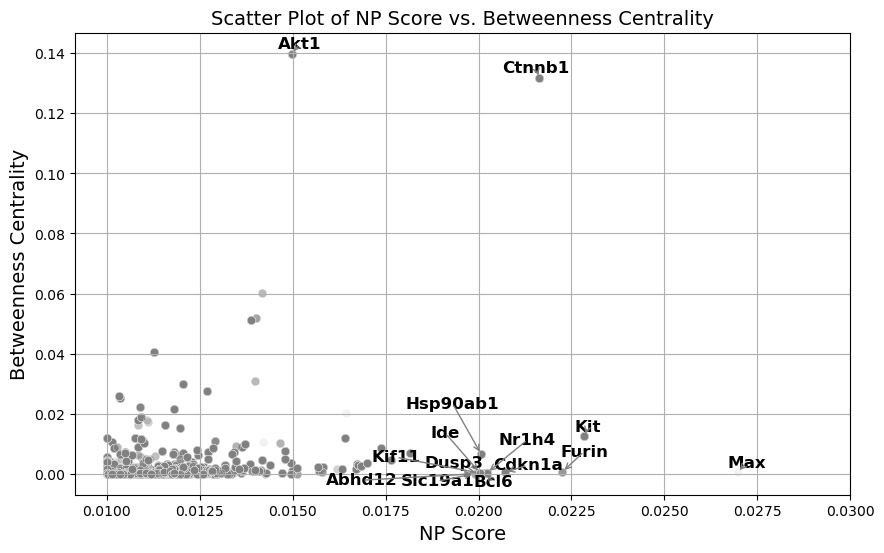

In [29]:
# np_score와 Betweenness Centrality가 높은 순서대로 정렬한 후, 유일한 gene 10개 선택
top_genes = subacute_betweennesscentrality.sort_values(
    by=['np_score', 'Betweenness Centrality'], ascending=False
).drop_duplicates(subset=['gene']).head(10)

# 추가할 gene: y축이 0.30 근처에 있는 점과 x축이 0.0200 근처, y축이 0.00 근처에 있는 점
additional_genes = subacute_betweennesscentrality[
    ((subacute_betweennesscentrality['Betweenness Centrality'] >= 0.12) |
     ((subacute_betweennesscentrality['np_score'] >= 0.0195) & 
      (subacute_betweennesscentrality['np_score'] <= 0.0205) &
      (subacute_betweennesscentrality['Betweenness Centrality'] <= 0.01)))
]

# 상위 10개의 gene과 추가 gene을 합침
all_genes = pd.concat([top_genes, additional_genes]).drop_duplicates(subset=['gene'])

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subacute_betweennesscentrality, x='np_score', y='Betweenness Centrality', alpha=0.1, color='gray')

# gene에 라벨 추가
texts = []
for _, row in all_genes.iterrows():
    text = plt.text(row['np_score'], row['Betweenness Centrality'], row['gene'], 
                    fontsize=12, ha='right', fontweight='bold')
    texts.append(text)

# adjust_text로 레이블 위치 자동 조정, 화살표 추가
adjust_text(
    texts, 
    only_move={'points': 'xy', 'text': 'xy'}, 
    arrowprops=dict(arrowstyle='->', color='gray'),  # 화살표 스타일 설정
    expand_text=(4, 4),  # 텍스트 간 간격을 더 넓힘
    expand_points=(2, 2),  # 점과 텍스트 간 간격을 더 넓힘
    force_text=5,  # 텍스트 간 밀어내기 강도를 높임
    force_points=1  # 텍스트와 점 간 밀어내기 강도를 높임
)

plt.xlabel('NP Score', fontsize=14)
plt.ylabel('Betweenness Centrality', fontsize=14)
plt.title('Scatter Plot of NP Score vs. Betweenness Centrality', fontsize=14)
plt.xlim(right=0.0300)
plt.grid(True)
plt.show()

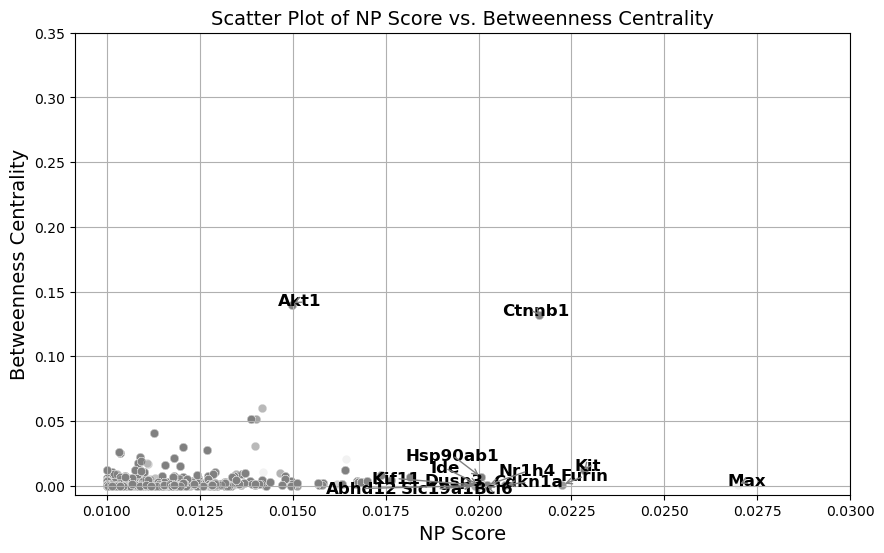

In [30]:
# np_score와 Betweenness Centrality가 높은 순서대로 정렬한 후, 유일한 gene 10개 선택
top_genes = subacute_betweennesscentrality.sort_values(
    by=['np_score', 'Betweenness Centrality'], ascending=False
).drop_duplicates(subset=['gene']).head(10)

# 추가할 gene: y축이 0.30 근처에 있는 점과 x축이 0.0200 근처, y축이 0.00 근처에 있는 점
additional_genes = subacute_betweennesscentrality[
    ((subacute_betweennesscentrality['Betweenness Centrality'] >= 0.12) |
     ((subacute_betweennesscentrality['np_score'] >= 0.0195) & 
      (subacute_betweennesscentrality['np_score'] <= 0.0205) &
      (subacute_betweennesscentrality['Betweenness Centrality'] <= 0.01)))
]

# 상위 10개의 gene과 추가 gene을 합침
all_genes = pd.concat([top_genes, additional_genes]).drop_duplicates(subset=['gene'])

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subacute_betweennesscentrality, x='np_score', y='Betweenness Centrality', alpha=0.1, color='gray')

# gene에 라벨 추가
texts = []
for _, row in all_genes.iterrows():
    text = plt.text(row['np_score'], row['Betweenness Centrality'], row['gene'], 
                    fontsize=12, ha='right', fontweight='bold')
    texts.append(text)

# adjust_text로 레이블 위치 자동 조정, 화살표 추가
adjust_text(
    texts, 
    only_move={'points': 'xy', 'text': 'xy'}, 
    arrowprops=dict(arrowstyle='->', color='gray'),  # 화살표 스타일 설정
    expand_text=(4, 4),  # 텍스트 간 간격을 더 넓힘
    expand_points=(2, 2),  # 점과 텍스트 간 간격을 더 넓힘
    force_text=5,  # 텍스트 간 밀어내기 강도를 높임
    force_points=1  # 텍스트와 점 간 밀어내기 강도를 높임
)

plt.xlabel('NP Score', fontsize=14)
plt.ylabel('Betweenness Centrality', fontsize=14)
plt.title('Scatter Plot of NP Score vs. Betweenness Centrality', fontsize=14)
plt.xlim(right=0.0300)
plt.ylim(top=0.35)
plt.grid(True)
plt.show()

In [24]:
# drug_name 열의 전체 내용을 표시하도록 설정
pd.set_option('display.max_colwidth', None)
all_genes[['gene', 'Pubchem_CID', 'drug_name', 'np_score', 'Betweenness Centrality']]

,gene,Pubchem_CID,drug_name,np_score,Betweenness Centrality
440552,Max,2836606,"4-(7-Nitro-benzo[1,2,5]oxadiazol-4-ylamino)-benzoic acid",0.026971,0.000472
25726,Kit,57496699,"N-[2-(4-{[3-chloro-4-(3-chlorophenoxy)phenyl]amino}-5H-pyrrolo[3,2-d]pyrimidin-5-yl)ethyl]-2-methyl-2-(methylsulfonyl)propanamide",0.022844,0.012434
284362,Furin,44156976,JNK Inhibitor XI,0.022256,0.000613
30722,Ctnnb1,71695771,1-Hydroxy-5-[2-(2H-tetrazol-5-yl)ethyl]-1H-indazole,0.021635,0.131747
133822,Cdkn1a,44388828,"2-(2-fluoro-4-methoxyphenyl)-5,6,7,8-tetrahydro-3H-[1]benzothiolo[2,3-d]pyrimidin-4-one",0.020711,0.000454
413544,Nr1h4,91896087,"6-[4-[[5-(1-Chloroethyl)-3-(3,5-dichloro-1-methyl-2-oxopyridin-4-yl)-1,2-oxazol-4-yl]methoxy]-2-methylphenyl]-1-methylindole-3-carboxylic acid",0.020237,0.000391
123992,Bcl6,25232818,"(4S)-N-[(2S,3R)-4-[[3-(dimethylamino)phenyl]methylamino]-3-hydroxy-1-phenylbutan-2-yl]-2-oxo-1-[[4-(trifluoromethyl)phenyl]methyl]imidazolidine-4-carboxamide",0.020166,0.000335
153032,Hsp90ab1,117890268,"8-(3,5-Dichlorophenyl)sulfanyl-9-hex-5-ynylpurin-6-amine",0.020070,0.006489
435032,Ide,138106813,"US9610322, 4a (cis olefin)",0.020034,0.000320
14988,Dusp3,6000533,"2-[2,6-dichloro-4-[(Z)-[6-ethoxycarbonyl-5-(3-methoxyphenyl)-7-methyl-3-oxo-5H-[1,3]thiazolo[3,2-a]pyrimidin-2-ylidene]methyl]phenoxy]acetic acid",0.020012,0.000320


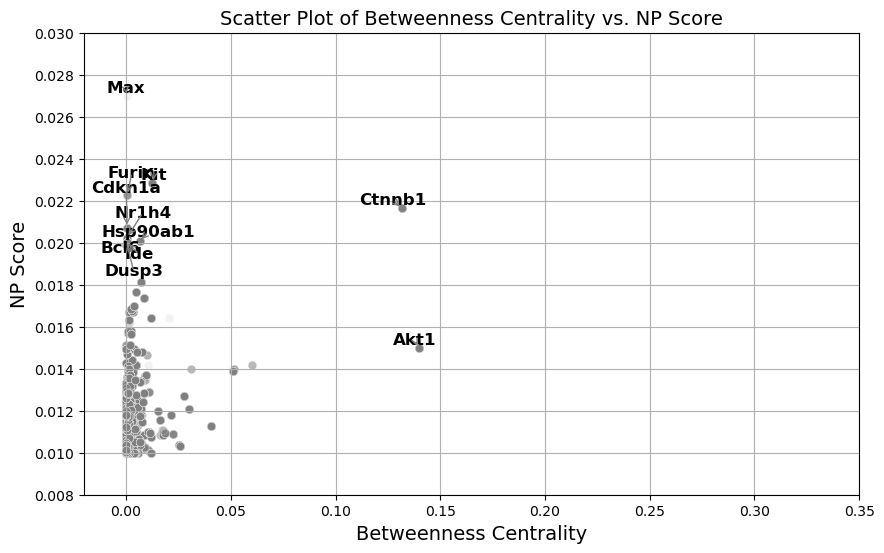

In [31]:
# np_score와 Betweenness Centrality가 높은 순서대로 정렬한 후, 유일한 gene 10개 선택
top_genes = subacute_betweennesscentrality.sort_values(
    by=['np_score', 'Betweenness Centrality'], ascending=False
).drop_duplicates(subset=['gene']).head(10)

# 추가할 gene: Betweenness Centrality가 0.30 근처에 있는 gene
additional_genes = subacute_betweennesscentrality[
    (subacute_betweennesscentrality['Betweenness Centrality'] >= 0.10) &
    (subacute_betweennesscentrality['Betweenness Centrality'] <= 0.15)
]

# 상위 10개의 gene과 추가 gene을 합침
all_genes = pd.concat([top_genes, additional_genes]).drop_duplicates(subset=['gene'])

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subacute_betweennesscentrality, x='Betweenness Centrality', y='np_score', alpha=0.1, color='gray')

# gene에 라벨 추가
texts = []
for _, row in all_genes.iterrows():
    text = plt.text(row['Betweenness Centrality'], row['np_score'], row['gene'], 
                    fontsize=12, ha='right', fontweight='bold')
    texts.append(text)

# adjust_text로 레이블 위치 자동 조정, 화살표 추가
adjust_text(
    texts, 
    only_move={'points': 'xy', 'text': 'xy'}, 
    arrowprops=dict(arrowstyle='->', color='gray'),  # 화살표 스타일 설정
    expand_text=(4, 4),  # 텍스트 간 간격을 더 넓힘
    expand_points=(2, 2),  # 점과 텍스트 간 간격을 더 넓힘
    force_text=5,  # 텍스트 간 밀어내기 강도를 높임
    force_points=1  # 텍스트와 점 간 밀어내기 강도를 높임
)

# 축 라벨, 범위 및 눈금 설정
plt.xlabel('Betweenness Centrality', fontsize=14)
plt.ylabel('NP Score', fontsize=14)
plt.title('Scatter Plot of Betweenness Centrality vs. NP Score', fontsize=14)
plt.xlim(-0.02, 0.35)
plt.ylim(0.008, 0.030)
plt.xticks(ticks=[i * 0.05 for i in range(8)])  # x축을 0.05 간격으로 설정
plt.yticks(ticks=[round(0.008 + i * 0.002, 3) for i in range(12)])  # y축을 0.002 간격으로 설정
plt.grid(True)
plt.show()